# Grays Harbor Topography

Modify topography from the Astoria 1/3" DEM, which was referenced to MHW, by an approximate adjustment to Mean Tide Level (MTL).  Around Grays Harbor, this adjustment is approximately linear in longitude, as verified separately using the [VDatum software](https://vdatum.noaa.gov/vdatumweb/).  We use the datums at Westport and Aberdeen to estimate the linear function.

In [1]:
%matplotlib inline

In [2]:
from pylab import *

In [3]:
from clawpack.geoclaw import topotools

In [4]:
server = 'https://www.ngdc.noaa.gov/thredds/dodsC/regional/'
url_astoria = server + 'astoria_13_mhw_2012.nc'
extent = [-124.2, -123.65, 46.8, 47.15]
GH_13sec_mhw = topotools.read_netcdf(url_astoria, extent=extent)

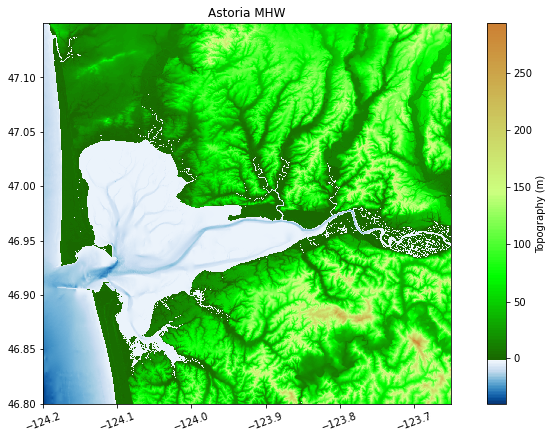

In [5]:
figure(figsize=(13,7))
ax = axes()
GH_13sec_mhw.crop(coarsen=3).plot(axes=ax)
title('Astoria MHW');

# Approximate conversion from MHW to MTL

Datums at Westport and Aberdeen tide gauges:

Datum | Westport | Aberdeen
------|----------|------------
 MHW  | 2.561    |  2.869
 diff | 1.068    |  1.21
 MTL  | 1.493    |  1.659
 diff | 1.068    |  1.21
 MLW  | 0.425    |  0.449
 
Topo referenced to MHW should be increased by 1.068m at Westport and by 1.21m at Aberdeen to reference to MTL. We use a linear function based on longitude:
 

In [6]:
Zmtl = GH_13sec_mhw.Z + (1.068 + (1.21-1.068)*(GH_13sec_mhw.X+124.105)/(-123.85+124.105))

In [7]:
GH_13sec_mtl = topotools.Topography()
GH_13sec_mtl.set_xyZ(GH_13sec_mhw.X, GH_13sec_mhw.Y, Zmtl)

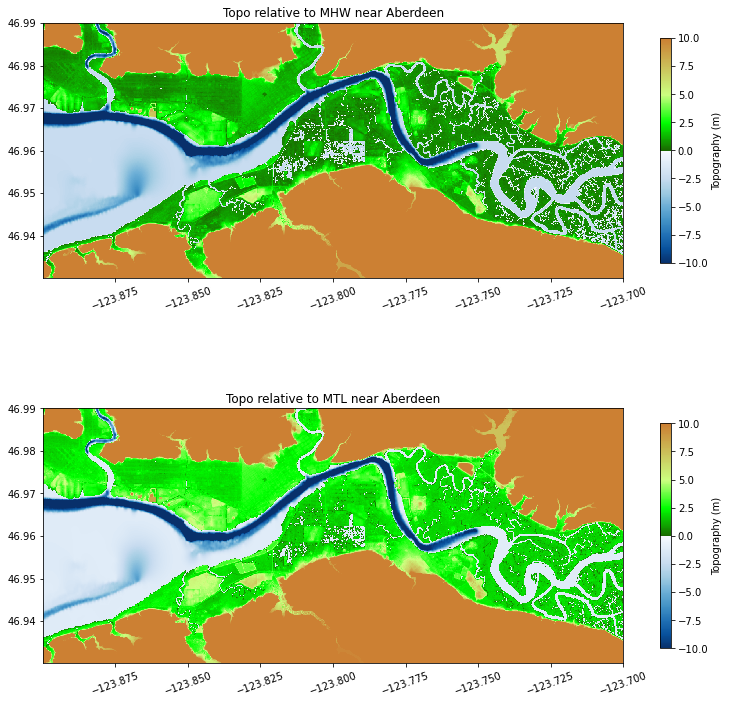

In [8]:
extent = [-123.9,-123.7,46.93,46.99]
figure(figsize=(13,13))
ax = subplot(211)
GH_13sec_mhw.crop(extent).plot(axes=ax,limits=(-10,10),
                              add_colorbar=True, cb_kwargs={'shrink':0.7})
title('Topo relative to MHW near Aberdeen')
ax = subplot(212)
GH_13sec_mtl.crop(extent).plot(axes=ax,limits=(-10,10),
                              add_colorbar=True, cb_kwargs={'shrink':0.7})
title('Topo relative to MTL near Aberdeen');

### Create topo file:

In [9]:
GH_13sec_mtl.write('GH_13sec_mtl.asc', topo_type=3, 
                   header_style='asc', Z_format='%10.3f')